In [9]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [13]:
df_deaths = pd.read_csv('deaths.csv', error_bad_lines=False)
df_deaths.head()

b'Skipping line 6488: expected 13 fields, saw 25\nSkipping line 14950: expected 13 fields, saw 14\nSkipping line 24290: expected 13 fields, saw 25\nSkipping line 42212: expected 13 fields, saw 25\n'


,death_number,username,player_name,rank,cause_of_death,brute_damage,brain_damage,fire_damage,oxy_damage,tox_damage,clone_damage,stamina_damage,murder_suspect
0,,AuStation -,,none,Blunt-Force Trauma,BRU,BRA,FIR,OXY,TOX,CLN,STM,none
1,2,mcterra,Cora Mathews,none,Severe Burns,0,0,163,40,0,0,0,none
2,1,rogueninja299,Sylar,none,Suffocation,60,0,11,200,0,0,0,none
3,3,nyarlo,Ebba Endsley,none,Severe Burns,0,0,203,3,0,0,0,none
4,,AuStation -,,none,Blunt-Force Trauma,BRU,BRA,FIR,OXY,TOX,CLN,STM,none


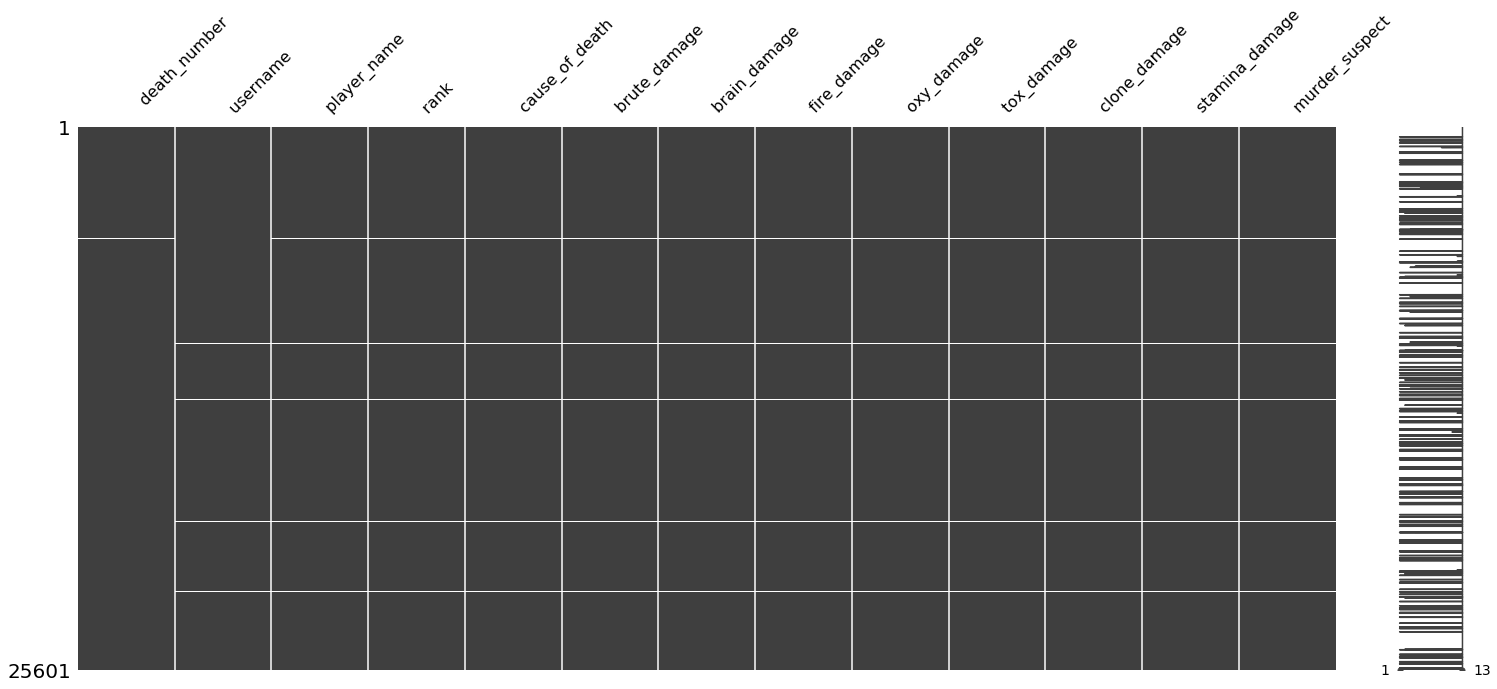

In [14]:
msno.matrix(df_deaths)

In [2]:
df_deaths.isna().sum()

NameError: name 'df_deaths' is not defined

In [19]:
df_rounds = pd.read_csv('rounds.csv', error_bad_lines=False)
df_rounds.sort_values('round_id')

,round_id,station_name,escape_shuttle_name,round_duration,total_deaths,complete_status,round_type
11,1,Spess Complex LXXV,No Escape Shuttle,00:10:14,0,Nuke,Extended
3,3,NaN,No Escape Shuttle,00:08:14,0,Admin Reboot - By Mcterra,Extended
13,6,Muppet Hut 96,Disco Inferno,01:02:19,0,Proper Completion,Extended
2,7,Battle Construct Three,Meta Emergency Shuttle,00:08:52,0,Proper Completion,Traitor
12,8,NaN,No Escape Shuttle,00:08:42,0,Admin Reboot - By Mcterra,NaN
...,...,...,...,...,...,...,...
2347,2579,Automated Meta City November,Meta Emergency Shuttle,02:21:09,20,Proper Completion,Traitor
2348,2580,Dorf Hazard 74,Meta Emergency Shuttle,02:51:42,13,Proper Completion,Traitor
2350,2581,Death-World Suffix Epsilon,Meta Emergency Shuttle,02:20:44,2,Proper Completion,Traitor
2349,2582,NaN,No Escape Shuttle,08:28:38,3,Restart Vote,Sandbox


In [27]:
df_rounds.set_index('round_id')
df_rounds.dropna(subset=['round_type'], inplace=True)

NameError: name 'round_type' is not defined

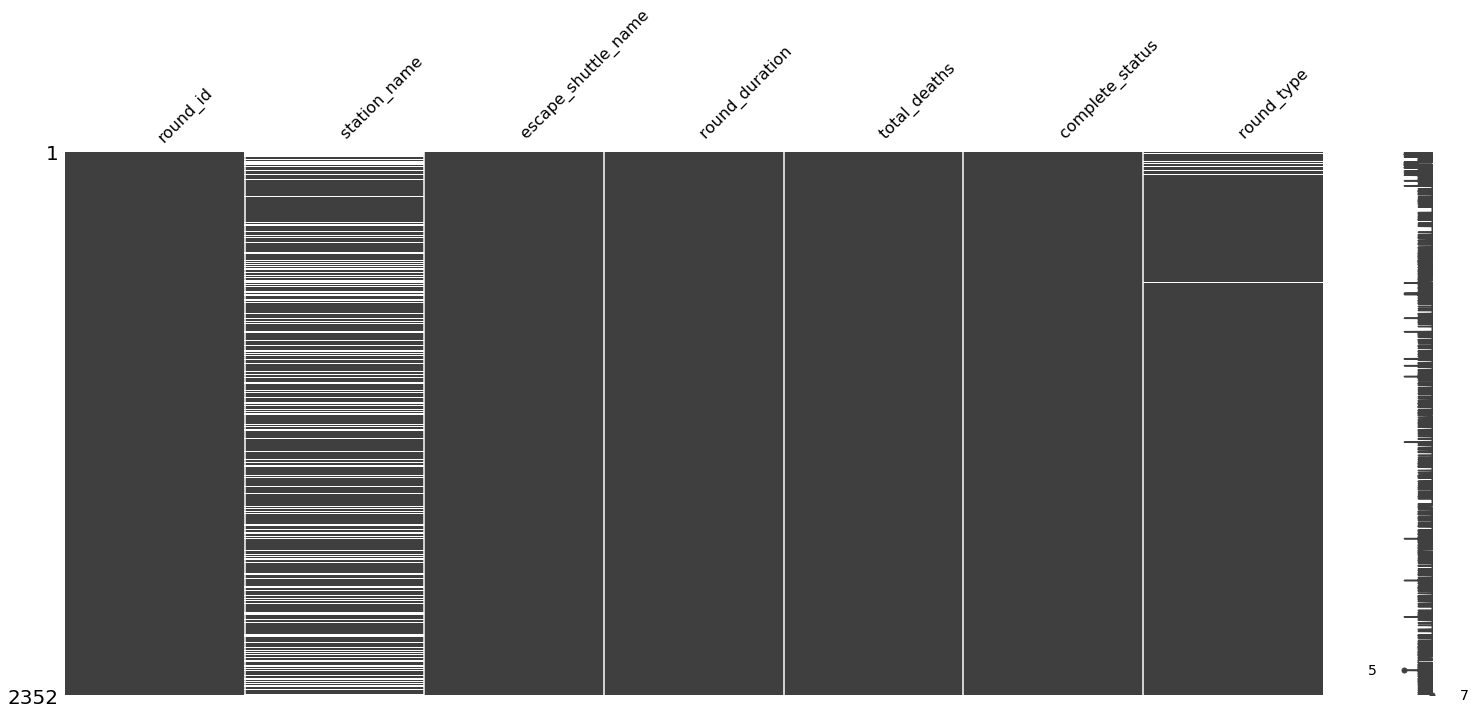

In [7]:
msno.matrix(df_rounds)

In [8]:
df_rounds.isna().sum()

round_id                  0
 station_name           650
 escape_shuttle_name      0
 round_duration           0
 total_deaths             0
 complete_status          0
 round_type              36
dtype: int64

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x='round_type', data=df_rounds)

ValueError: Could not interpret input 'round_type'